## Problem 1.5

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
grades = np.array([73,91,72,81,82,46,89,75,62,58,
                  73,46,64,61,50,89,91,82,71,76,
                  69,70,82,90,63,70,94,44,100,88,
                  56,94,51,79,63,87,54,100,72,81])

In [ ]:
def gauss(x, mu, sigma):
    exponent = -0.5*((x-mu)/sigma)**2
    const = 1./(sigma*np.sqrt(2.0*np.pi))
    
    return const*np.exp(exponent)

In [2]:
grades.mean()

73.475

In [3]:
np.median(grades)

73.0

In [4]:
import pandas as pd

In [74]:
grades_binned = (grades//10)*10
grades_binned_value_counts = pd.Series(grades_binned).value_counts().sort_index()
grades_binned_value_counts

40      3
50      5
60      6
70     10
80      9
90      5
100     2
dtype: int64

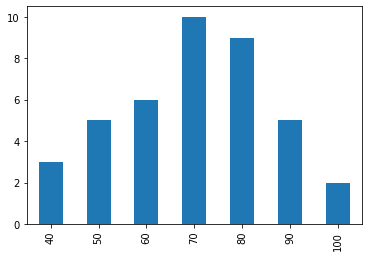

In [75]:
grades_binned_value_counts.plot.bar()

(array([ 3.,  5.,  6., 10.,  9.,  5.,  2.]),
 array([ 40,  50,  60,  70,  80,  90, 100, 110]),
 <a list of 7 Patch objects>)

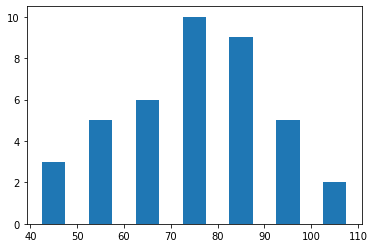

In [88]:
plt.hist(grades,bins=[40,50,60,70,80,90,100,110], rwidth=0.5)

### Do the Grades follow a Normal Distribution?

In [105]:
grades_mean = grades.mean()
grades_sd = grades.std(ddof=1)
bin_width=10;
bins_lower = np.array([40,50,60,70,80,90,100,110])
bins_mid = bins_lower[:-1]+(bin_width/2)
bins_mid

array([ 45.,  55.,  65.,  75.,  85.,  95., 105.])

In [106]:
 bin_counts = np.histogram(grades, bins_lower)[0]

In [109]:
# calculate expected value in each bin
N = len(grades)
#probability at each bin midpoint
p_bin_mid = gauss(bins_mid, grades_mean, grades_sd)
#expected value is the probability * binwidth * number of grades
bin_exp = p_bin_mid*bin_width*N
bin_exp

array([ 1.91034576,  5.06255697,  8.85780865, 10.2324844 ,  7.80430645,
        3.92994039,  1.3065801 ])

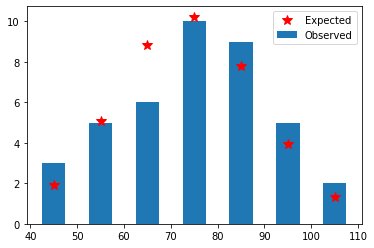

In [110]:
plt.hist(grades,bins=bins_lower, rwidth=0.5, label='Observed')
plt.plot(bins_mid, bin_exp, color='red',label='Expected', marker='*', ms=10, ls='None')
plt.legend()

In [120]:
#Calculate Chi-Square stat
chi_val = ((bin_counts-bin_exp)**2/bin_exp).sum()
#degrees of freedom is number of bins - 1 - number of params estimated (in this case x_bar and s)
# degrees of freedom in this case 7-1-2 = 4
dof = 7-1-2
alpha=0.05
#critical value (alpha=0.05, dof=4)
crit_val = chi2.ppf(1-alpha, dof)

print(f'Null Hypothesis: Grades came from N({grades_mean}, {grades_sd:.2f}) ')
print('Alternative Hypothesis: Grades came from some other population')
print()
print(f'Chi-sq value: {chi_val}, Critical value (alpha: {alpha}, dof: {dof}): {crit_val}')
if chi_val <= crit_val:
    print('Insufficient evidence to reject Null Hypothesis')
else:
    print('Evidence sufficient to reject Null Hypothesis')

Null Hypothesis: Grades came from N(73.475, 15.52) 
Alternative Hypothesis: Grades came from some other population

Chi-sq value: 2.392168185589538, Critical value (alpha: 0.05, dof: 4): 9.487729036781154
Insufficient evidence to reject Null Hypothesis


In [112]:
chi_val

2.392168185589538

9.487729036781154

## Problem 4.1

In [9]:
dice2= np.array([3,7,3,7,12,8,9,7,5,7,
                12,8,6,6,7, 6,7,8,9,8,
                5,10,8,8,8])


In [10]:
dice2.mean()

7.36

In [11]:
dice2.std(ddof=1)

2.177154105707724

In [12]:
dice2.std(ddof=1)/np.sqrt(len(dice2))

0.43543082114154485

## Problem 4.7

In [13]:
grays = np.array([125, 130, 105, 126, 128,119,137,131,115,116])
background = 58; background_dt = 5

#mean background and its uncertainty:
background_mu = background/background_dt
background_sigma = np.sqrt(background)/background_dt

corrected_counts = grays - background_mu

print(f'Mean Total Count: {grays.mean()}, sigma: {grays.std(ddof=1):.1f}, sigma_mu: {grays.std(ddof=1)/np.sqrt(len(grays)):.1f} ')
print(f'Mean background: {background_mu:.2f}, Uncertainty: {background_sigma:.1f}')
print(f'Corrected Mean: {corrected_counts.mean():.1f}, plus/minus {np.sqrt(corrected_counts.sum())/len(corrected_counts):.1f}')

Mean Total Count: 123.2, sigma: 9.4, sigma_mu: 3.0 
Mean background: 11.60, Uncertainty: 1.5
Corrected Mean: 111.6, plus/minus 3.3


In [14]:
np.sqrt(corrected_counts.sum())/len(corrected_counts)

3.3406586176980135

## Problem 4.9

In [15]:
mean_life = pd.DataFrame([(34.3, 1.6),
(32.2, 1.2),
(35.4, 1.5),
(33.5, 1.4),
(34.7, 1.6),
(33.5, 1.5),
(27.9, 1.9),
(32.0, 1.2),
(32.4, 1.4),
(31.0, 1.8),
(19.8, 1.3) ], columns=['Tau', 'Sigma_tau'])
mean_life

,Tau,Sigma_tau
0,34.3,1.6
1,32.2,1.2
2,35.4,1.5
3,33.5,1.4
4,34.7,1.6
5,33.5,1.5
6,27.9,1.9
7,32.0,1.2
8,32.4,1.4
9,31.0,1.8


In [16]:
def weighted_mean(means, errors):
    err_sq = errors**2
    inv_err_sq_sum = (1/err_sq).sum()
    
    xbar = (means/err_sq).sum()/inv_err_sq_sum
    
    sigma = np.sqrt(1/inv_err_sq_sum)
    
    return {'weighted_mean': xbar, 'sigma': sigma}
    
    

In [17]:
weighted_mean(mean_life.Tau, mean_life.Sigma_tau)

{'weighted_mean': 31.34862842377927, 'sigma': 0.4361533192321092}

In [18]:
mean_life.Tau.mean()

31.518181818181816

In [19]:
mean_life.Tau.std(ddof=1)

4.39245220391029

In [20]:
mean_life.Tau.std(ddof=1)/np.sqrt(len(mean_life))

1.3243741699945528

In [21]:
mean_life.Tau.sum()/(len(mean_life))

31.518181818181816

In [22]:
exp1 = np.full(40,1.022)
s1 = np.full(40, 0.01)
exp2 = np.full(10, 1.018)
s2 = np.full(10,0.004)

In [23]:
all_exp = np.concatenate([exp1, exp2])
all_s = np.concatenate([s1,s2])

In [24]:
all_s

array([0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 , 0.01 ,
       0.01 , 0.01 , 0.01 , 0.01 , 0.004, 0.004, 0.004, 0.004, 0.004,
       0.004, 0.004, 0.004, 0.004, 0.004])

In [25]:
weighted_mean(all_exp, all_s)

{'weighted_mean': 1.0195609756097561, 'sigma': 0.0009877295966495897}

In [26]:
from scipy.optimize import minimize_scalar
def mle(mu_hat, x):
    return ((x - mu_hat)**2).sum()

In [27]:
minimize_scalar(mle, bounds=(30.0, 35.0), args=(mean_life.Tau))


     fun: 192.93636363636364
    nfev: 10
     nit: 4
 success: True
       x: 31.51818181818129

In [28]:
mean_life.Tau.mean()

31.518181818181816

## Problem 4.13

In [29]:
from scipy.stats import chi2
def gauss(x, mu, sigma):
    exponent = -0.5*((x-mu)/sigma)**2
    const = 1./(sigma*np.sqrt(2.0*np.pi))
    
    return const*np.exp(exponent)
    

In [30]:
xx=np.linspace(10,30,10000)
yy=gauss(xx, 20, 3)

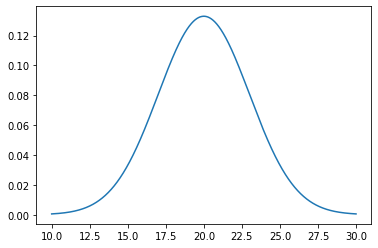

In [31]:
plt.plot(xx,yy)

In [32]:
mu=26.0;sigma=5.0

bin_counts = np.array([4,8,11,20,26,31,29,22,26,13,5,2,3])


N = bin_counts.sum() # total number of observations
bin_width = 2
bin_bounds = np.arange(14,14+bin_width*len(bin_counts),bin_width)
bin_mids=bin_bounds+(bin_width/2.0)
#mu = (bin_counts*bin_mids).sum()/bin_counts.sum()

count_hat = N*gauss(bin_mids, mu, sigma)*bin_width
#normalize:
#count_hat = count_hat*N/count_hat.sum()
sigma_hat = np.sqrt(count_hat)
sigma_obs = np.sqrt(bin_counts)
#xx = np.linspace(bin_bounds.min(),bin_bounds.max(),10000)
#g = gauss(xx, 26.0, 5.0)

In [33]:
mu, (bin_counts*bin_mids).sum()/bin_counts.sum()

(26.0, 26.1)

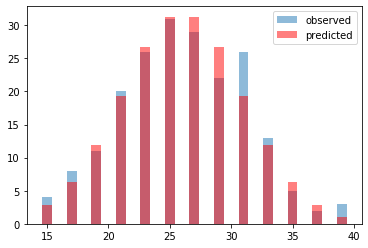

In [34]:
plt.bar(bin_mids, bin_counts, label='observed', alpha=0.5)
plt.bar(bin_mids, count_hat, label='predicted', color='red', alpha=0.5)

plt.legend()


In [35]:
#chi_sq =(((bin_counts-count_hat)**2)/(sigma_hat**2+sigma_obs**2)).sum()
#chi_sq = ((bin_counts-count_hat)**2/sigma_obs**2).sum()
chi_sq = (((count_hat-bin_counts)/sigma_hat)**2).sum()
print(f'Chi Square: {chi_sq}, dof: {len(bin_mids)-1}')

Chi Square: 8.282463696269634, dof: 12


In [36]:
tbl413 = pd.DataFrame({'Bin-Low':bin_bounds, 'Bin-Mid':bin_mids, 'Bin_Width':bin_width, 'ObsFreq':bin_counts,
             'y_i':count_hat, 'sigma_y_i':sigma_hat,
             'std_dev': (bin_counts-count_hat)/sigma_hat})
tbl413

,Bin-Low,Bin-Mid,Bin_Width,ObsFreq,y_i,sigma_y_i,std_dev
0,14,15.0,2,4,2.837967,1.684627,0.689786
1,16,17.0,2,8,6.316013,2.513168,0.670066
2,18,19.0,2,11,11.978197,3.460953,-0.282638
3,20,21.0,2,20,19.357658,4.399734,0.145996
4,22,23.0,2,26,26.657968,5.163136,-0.127436
5,24,25.0,2,31,31.283416,5.593158,-0.050672
6,26,27.0,2,29,31.283416,5.593158,-0.408252
7,28,29.0,2,22,26.657968,5.163136,-0.902159
8,30,31.0,2,26,19.357658,4.399734,1.509715
9,32,33.0,2,13,11.978197,3.460953,0.295237


following methodology of example 4.1, calculate mean from sample data

In [37]:
sample_mean = (bin_counts*bin_mids).sum()/bin_counts.sum()
sample_sd = np.sqrt((bin_counts*((bin_mids-sample_mean)**2)).sum()/(bin_counts.sum()-1))
print(f'Sample mean: {sample_mean}, Given population stddev: {sigma}, Sample stddev: {sample_sd:.2f}')
tbl413['y_i_sample']= N*gauss(bin_mids, sample_mean, sample_sd)*bin_width
tbl413['sigma_y_i_sample'] = np.sqrt(tbl413.y_i_sample)
tbl413['std_dev_sample'] = (tbl413.ObsFreq - tbl413.y_i_sample )/tbl413.sigma_y_i_sample
tbl413

Sample mean: 26.1, Given population stddev: 5.0, Sample stddev: 5.06


,Bin-Low,Bin-Mid,Bin_Width,ObsFreq,y_i,sigma_y_i,std_dev,y_i_sample,sigma_y_i_sample,std_dev_sample
0,14,15.0,2,4,2.837967,1.684627,0.689786,2.850869,1.688452,0.680583
1,16,17.0,2,8,6.316013,2.513168,0.670066,6.268336,2.503665,0.691652
2,18,19.0,2,11,11.978197,3.460953,-0.282638,11.791522,3.433879,-0.230504
3,20,21.0,2,20,19.357658,4.399734,0.145996,18.977108,4.356272,0.234809
4,22,23.0,2,26,26.657968,5.163136,-0.127436,26.129600,5.111712,-0.025353
5,24,25.0,2,31,31.283416,5.593158,-0.050672,30.780669,5.548033,0.039533
6,26,27.0,2,29,31.283416,5.593158,-0.408252,31.021724,5.569715,-0.362985
7,28,29.0,2,22,26.657968,5.163136,-0.902159,26.748311,5.171877,-0.918102
8,30,31.0,2,26,19.357658,4.399734,1.509715,19.731922,4.442063,1.411074
9,32,33.0,2,13,11.978197,3.460953,0.295237,12.453315,3.528925,0.154916


In [38]:
print(f'Known Mu: Chi Square: {(tbl413.std_dev**2).sum():.2f} with {len(tbl413.ObsFreq)-1} degrees of freedom')
print(f'Sample Mu: Chi Square: {(tbl413.std_dev_sample**2).sum():.2f} with {len(tbl413.ObsFreq)-3} degrees of freedom')

Known Mu: Chi Square: 8.28 with 12 degrees of freedom
Sample Mu: Chi Square: 7.44 with 10 degrees of freedom


The Known Mu case is what the problem appears to be asking for. However the value above (8.28) differs considerably with the answer given in the Appendix of 14.7.  The methodology above is consistent with Table 4.2/Example 4.1 which produce the correct results. Not sure what's wrong above.

In [39]:
tbl413.y_i.sum()

197.94907564577795

In [40]:

count_hat.sum()

197.94907564577795

In [41]:
from scipy.stats import norm

In [42]:
xx = np.linspace(-3,3, 10000)
g1 = gauss(xx, 0,1)
g2 = norm().pdf(xx)

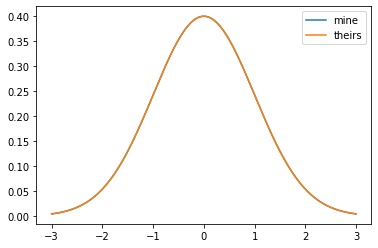

In [43]:
plt.plot(xx,g1, label='mine')
plt.plot(xx,g2, label='theirs')
plt.legend()

In [44]:
np.allclose(g1,g2)

True

In [45]:
g3 = gauss(bin_mids, mu, sigma)
g4 = norm(loc=mu, scale=sigma).pdf(bin_mids)

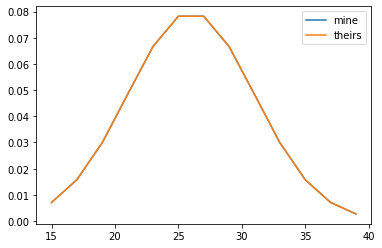

In [46]:
plt.plot(bin_mids,g3, label='mine')
plt.plot(bin_mids,g4, label='theirs')
plt.legend()

In [47]:
np.allclose(g3,g4)

True

In [48]:
g3.sum()

0.49487268911444493

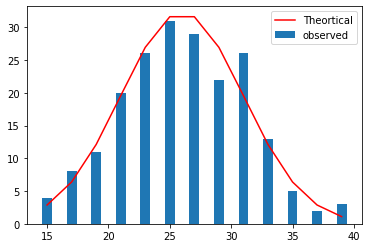

In [49]:
plt.bar(bin_mids, bin_counts, label='observed')
plt.plot(bin_mids,N*g3/g3.sum(), label='Theortical', color='red')
plt.legend()

In [50]:
N = bin_counts.sum() # number of observations
mu = 26.0; sigma = 5.0
count_raw = gauss(bin_mids, mu, sigma)
count_hat = N*(count_raw/count_raw.sum()) # normalize for the values we have
chi_sq = (((bin_counts-count_hat)**2)/(sigma**2)).sum()
print(f'Chi Square: {chi_sq}')

Chi Square: 3.4512384718183915


In [51]:
count_hat.sum()

199.99999999999994

## Example 4.1/Table 4.2

In [52]:
#table 4.2
N42=50
t, bin_width = np.linspace(0.595, 0.695,11, endpoint=True, retstep=True)
bin_counts= np.array([2,2,11,6,12,8, 4,3,1,1,0])
assert len(t)==len(bin_counts)

In [53]:
#calculate probability at each bin's mid point
mu_true = 0.639; sigma_true = 0.020
y_true_mid = gauss(t, mu_true, sigma_true)

#need to multiply by the bin width to get the expected count in the bin
#   time total number of observations
y_j = y_true_mid*bin_width * N42
y_j

array([0.88686482, 2.35122693, 4.85465137, 7.80634833, 9.77606735,
       9.53469539, 7.24228882, 4.2842148 , 1.97375396, 0.70817594,
       0.19788629])

In [54]:
tbl42 = pd.DataFrame({'Time':t,
              'h_j':bin_counts,'y_j':y_j, 'sigma_y_j':np.sqrt(y_j), 'y_j_minus_h_j_over_sigma_j':(y_j-bin_counts)/np.sqrt(y_j)})


In [55]:
#sample distribution:
t_bar = 0.635 # from example 4.1 (note disagrees with weighted mean of observations)
sigma_s = 0.02
y_sample_mid = gauss(t, t_bar, sigma_s)

#need to multiply by the bin width to get the expected count in the bin
#   time total number of observations
y_sample_j = y_sample_mid*bin_width * N42
tbl42['y_sample_j'] = y_sample_j
tbl42['y_sample_sigma_j'] = np.sqrt(y_sample_j)
tbl42['std_dev'] = (y_sample_j-bin_counts)/np.sqrt(y_sample_j)
tbl42

,Time,h_j,y_j,sigma_y_j,y_j_minus_h_j_over_sigma_j,y_sample_j,y_sample_sigma_j,std_dev
0,0.595,2,0.886865,0.941735,-1.182005,1.349774,1.161798,-0.559672
1,0.605,2,2.351227,1.533371,0.229055,3.237940,1.799428,0.687963
2,0.615,11,4.854651,2.203327,-2.789122,6.049268,2.459526,-2.012880
3,0.625,6,7.806348,2.793984,0.646513,8.801633,2.966755,0.944343
4,0.635,12,9.776067,3.126670,-0.711278,9.973557,3.158094,-0.641666
5,0.645,8,9.534695,3.087830,0.497014,8.801633,2.966755,0.270205
6,0.655,4,7.242289,2.691150,1.204797,6.049268,2.459526,0.833196
7,0.665,3,4.284215,2.069834,0.620443,3.237940,1.799428,0.132231
8,0.675,1,1.973754,1.404904,0.693111,1.349774,1.161798,0.301063
9,0.685,1,0.708176,0.841532,-0.346777,0.438208,0.661972,-0.848664


Table above agrees with Table 4.2 in the book.

In [56]:
chi_val_theory = (tbl42.y_j_minus_h_j_over_sigma_j**2).sum()
prob_theory = chi2.cdf(chi_val_theory, 10)
chi_val_sample = (tbl42.std_dev**2).sum()
prob_sample = chi2.cdf(chi_val_sample, 8)
print(f'Theory: Chi Val: {chi_val_theory:.2f}, Probability >: {1-prob_theory:.2f}')
print(f'Sample: Chi Val: {chi_val_sample:.2f}, Probability >: {1-prob_sample:.2f}')

Theory: Chi Val: 13.03, Probability >: 0.22
Sample: Chi Val: 7.85, Probability >: 0.45


These agree with the values given in the book.